---
title: "Coldest"
date: 2026-02-15T13:07:28-05:00
draft: false

# optional thumbnail
images:
  - "https://s3.amazonaws.com/my-blog-content/2026-02-14-coldest/IMG_9715_preview.jpeg"
cover:
  image: "https://s3.amazonaws.com/my-blog-content/2026-02-14-coldest/IMG_9715_preview.jpeg"
---

Recently, myself and the rest of NYC went through a cold spell and news outlets reported<sup>[2](#references)</sup> the 13 day stretch of sub-zero weather, ending Feb 6th, was not longer than a 16 stretch in 1881. And this was shorter than a 1963 stretch, but tying a 2018-01-13 streak.

But this recent winter sure felt extreme. I know there is a recency bias, but I figured, why not also compare the area under the curve too. So I ranked the coldest 14-day stretches, using available data of the past decade. And then tried to visualize the spans of the coldest years too.

But even by that measure, it still looks like 2018 was colder.

## Sourcing
Doing this all with a ChatGPT agent, that obtained the data from a weather api I hadn't heard about before, open meteo<sup>[1](#references)</sup>, so I figured let's just plot all the data first as a sanity check.

In [3]:
from brr_cold.download import download_open_meteo

In [4]:
# download_open_meteo()

In [7]:
from brr_cold.winter import plot_full_timeseries, load_open_meteo_archive_json

weather = load_open_meteo_archive_json("data/archive.json")
df = weather.df
df.head()

date,low_temp_F,high_temp_F,feels_like_low_F,feels_like_high_F,sunrise,sunset
date,f64,f64,f64,f64,datetime[μs],datetime[μs]
2016-02-15,13.3,40.5,5.7,35.6,2016-02-15 06:50:00,2016-02-15 17:30:00
2016-02-16,32.0,52.7,24.6,45.5,2016-02-16 06:49:00,2016-02-16 17:31:00
2016-02-17,29.0,42.6,21.3,33.9,2016-02-17 06:47:00,2016-02-17 17:32:00
2016-02-18,23.9,34.9,14.6,24.5,2016-02-18 06:46:00,2016-02-18 17:33:00
2016-02-19,21.1,35.3,13.2,26.9,2016-02-19 06:45:00,2016-02-19 17:34:00


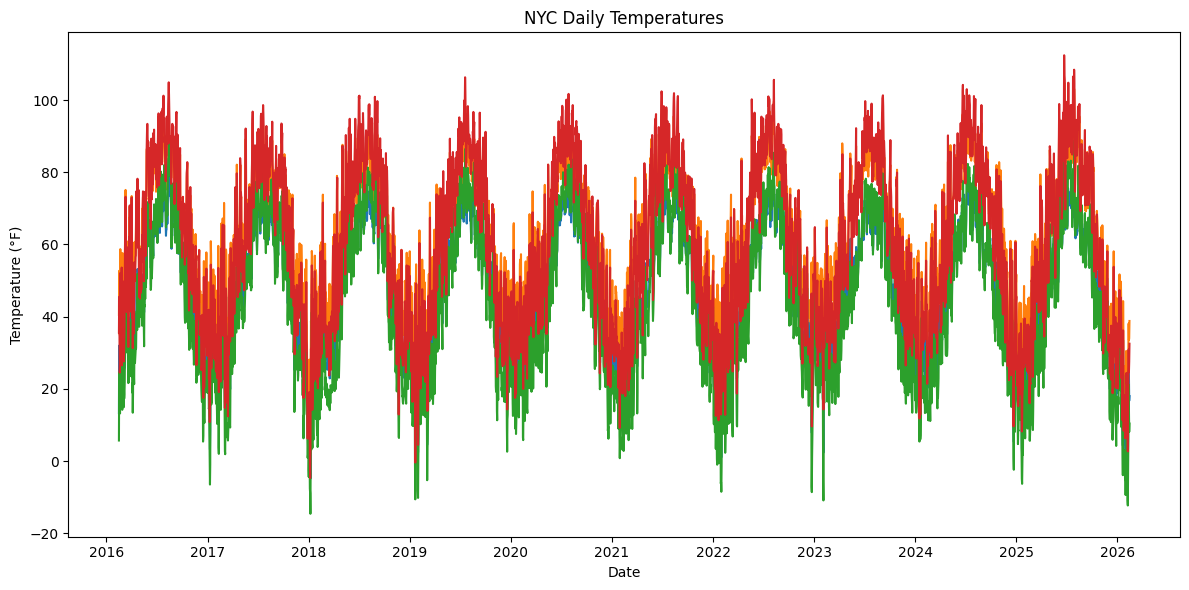

In [8]:
plot_full_timeseries(df)

## What to compare
I wanted to compare the area under the curve, but I didn't want to mess around with negative numbers, so I figured it would be safer to use the highs and not the lows, since the Fahrenheit lows will have negatives, but in NY, spot checking, I didn't see any days where there were highs that were negative Fahrenheit. This is not yet the arctic luckily!

So here is how I phrased the metric for comparison in my prompt, for using the *feels like* data and just the standard temperature data too. 

```python
w14_feels_like_high_F(t) = feels_like_high_F(t - 14) + feels_like_high_F(t - 13) + ... + feels_like_high_F(t - 1) 
```

```python
w14_high_temp_F(t) = w14_high_temp_F(t - 14) + w14_high_temp_F(t - 13) + ... + w14_high_temp_F(t - 1)
```




## Ranked spans
Initially, I was kind of shocked I didn't see `2026` data anywhere in the rolling window data, but then I realized oops I was using data up to `2025-02-14` instead of `2026-02-14` yikes! Then I pulled with the additional year and yes, both 2026 and 2018 were filling up the coldest 14-day stretches.


In [9]:
from brr_cold.winter import add_rolling_14day_averages_excluding_today

df2 = add_rolling_14day_averages_excluding_today(df)

In [24]:
df2[-50:]

date,low_temp_F,high_temp_F,feels_like_low_F,feels_like_high_F,sunrise,sunset,w14_high_avg_F,w14_feels_like_high_avg_F
date,f64,f64,f64,f64,datetime[μs],datetime[μs],f64,f64
2025-12-27,17.5,30.2,9.8,22.4,2025-12-27 07:19:00,2025-12-27 16:35:00,38.835714,32.05
2025-12-28,11.2,34.6,4.2,28.4,2025-12-28 07:19:00,2025-12-28 16:36:00,38.221429,31.364286
2025-12-29,28.5,45.2,17.8,38.3,2025-12-29 07:19:00,2025-12-29 16:37:00,38.357143,31.442857
2025-12-30,26.0,31.5,16.5,20.5,2025-12-30 07:20:00,2025-12-30 16:37:00,39.671429,32.835714
2025-12-31,25.4,31.5,15.9,21.4,2025-12-31 07:20:00,2025-12-31 16:38:00,39.935714,32.814286
…,…,…,…,…,…,…,…,…
2026-02-10,14.3,31.5,6.9,23.6,2026-02-10 06:55:00,2026-02-10 17:24:00,22.885714,14.871429
2026-02-11,30.6,38.1,21.2,30.9,2026-02-11 06:54:00,2026-02-11 17:25:00,23.792857,15.907143
2026-02-12,23.4,33.5,14.6,24.6,2026-02-12 06:53:00,2026-02-12 17:27:00,25.092857,17.271429


In [27]:
print(
    df2.drop_nulls()
    .sort("w14_high_avg_F", descending=False)
    [:10]
    .select("date", "w14_high_avg_F", "w14_feels_like_high_avg_F"))

shape: (10, 3)
┌────────────┬────────────────┬───────────────────────────┐
│ date       ┆ w14_high_avg_F ┆ w14_feels_like_high_avg_F │
│ ---        ┆ ---            ┆ ---                       │
│ date       ┆ f64            ┆ f64                       │
╞════════════╪════════════════╪═══════════════════════════╡
│ 2018-01-09 ┆ 22.035714      ┆ 10.592857                 │
│ 2018-01-08 ┆ 22.692857      ┆ 11.378571                 │
│ 2018-01-10 ┆ 22.807143      ┆ 11.642857                 │
│ 2026-02-10 ┆ 22.885714      ┆ 14.871429                 │
│ 2026-02-09 ┆ 22.992857      ┆ 14.935714                 │
│ 2026-02-07 ┆ 23.221429      ┆ 15.078571                 │
│ 2018-01-11 ┆ 23.628571      ┆ 12.721429                 │
│ 2026-02-08 ┆ 23.692857      ┆ 15.735714                 │
│ 2026-02-11 ┆ 23.792857      ┆ 15.907143                 │
│ 2026-02-06 ┆ 23.814286      ┆ 15.35                     │
└────────────┴────────────────┴───────────────────────────┘


## Lets rank the coldest

In [56]:
from datetime import timedelta

In [35]:
import polars as pl
df2 = df2.with_columns(
    pl.col("date").dt.year().alias("year")
)


yearly_min = (
    df2.drop_nans(subset=["w14_high_avg_F"])
    .sort("w14_high_avg_F")
    .group_by("year")
    .first()
    
)
yearly_min


year,date,low_temp_F,high_temp_F,feels_like_low_F,feels_like_high_F,sunrise,sunset,w14_high_avg_F,w14_feels_like_high_avg_F
i32,date,f64,f64,f64,f64,datetime[μs],datetime[μs],f64,f64
2018,2018-01-09,23.6,38.8,15.4,31.1,2018-01-09 07:19:00,2018-01-09 16:46:00,22.035714,10.592857
2023,2023-01-01,40.9,53.5,35.2,49.4,2023-01-01 07:20:00,2023-01-01 16:39:00,41.228571,32.571429
2026,2026-02-10,14.3,31.5,6.9,23.6,2026-02-10 06:55:00,2026-02-10 17:24:00,22.885714,14.871429
2021,2021-02-21,17.1,33.2,7.6,25.3,2021-02-21 06:41:00,2021-02-21 17:38:00,32.228571,24.857143
2017,2017-01-11,38.3,50.7,30.3,46.9,2017-01-11 07:19:00,2017-01-11 16:49:00,36.785714,28.035714
…,…,…,…,…,…,…,…,…,…
2025,2025-01-28,26.7,39.9,20.2,29.3,2025-01-28 07:09:00,2025-01-28 17:08:00,30.992857,22.735714
2024,2024-01-29,30.9,42.5,23.7,30.8,2024-01-29 07:09:00,2024-01-29 17:09:00,36.535714,28.842857
2020,2020-12-28,31.2,49.2,23.9,42.3,2020-12-28 07:19:00,2020-12-28 16:36:00,38.935714,31.057143


In [37]:
top5_years = yearly_min.sort("w14_high_avg_F").head(5)["year"].to_list()
top5_years

[2018, 2026, 2025, 2022, 2021]

In [55]:
y = 2018
row = yearly_min.filter(pl.col("year") == y).row(0, named=True)
row


{'year': 2018,
 'date': datetime.date(2018, 1, 9),
 'low_temp_F': 23.6,
 'high_temp_F': 38.8,
 'feels_like_low_F': 15.4,
 'feels_like_high_F': 31.1,
 'sunrise': datetime.datetime(2018, 1, 9, 7, 19),
 'sunset': datetime.datetime(2018, 1, 9, 16, 46),
 'w14_high_avg_F': 22.03571428571428,
 'w14_feels_like_high_avg_F': 10.592857142857142}

In [61]:
end_date_exclusive = row["date"]
start_date = end_date_exclusive - timedelta(days=14)
end_date_inclusive = end_date_exclusive - timedelta(days=1)

(
    df2.filter(pl.col("date") >= start_date).filter(pl.col("date") < end_date_exclusive)
    .select("date","high_temp_F")
    .with_columns(
        pl.lit(y).alias("year")
    )
    .with_row_index(name="day_index")
)

day_index,date,high_temp_F,year
u32,date,f64,i32
0,2017-12-26,28.0,2018
1,2017-12-27,25.2,2018
2,2017-12-28,19.2,2018
3,2017-12-29,24.3,2018
4,2017-12-30,25.6,2018
…,…,…,…
9,2018-01-04,24.4,2018
10,2018-01-05,15.4,2018
11,2018-01-06,9.1,2018


In [65]:
df3 = (
        df2
        .filter(pl.col("date") >= start_date)
        .filter(pl.col("date") < end_date_exclusive)
        .select(["date","high_temp_F"])
        .with_columns(
            pl.lit(y).alias("year")
        )
        .with_row_index(name="day_index")
    )
df3["high_temp_F"].mean()


22.035714285714285

In [66]:
top5_years

[2018, 2026, 2025, 2022, 2021]

In [67]:
rows = []
meta = []

for y in top5_years:
    # row = yearly_min[yearly_min["year"] == y].iloc[0]
    row = yearly_min.filter(pl.col("year") == y).row(0, named=True)

    end_date_exclusive = row["date"]
    start_date = end_date_exclusive - timedelta(days=14)
    end_date_inclusive = end_date_exclusive - timedelta(days=1)

    df3 = (
        df2
        .filter(pl.col("date") >= start_date)
        .filter(pl.col("date") < end_date_exclusive)
        .select(["date","high_temp_F"])
        .with_columns(
            pl.lit(y).alias("year")
        )
        .with_row_index(name="day_index")
    )
    # .to_dicts()

    rows.extend(df3.to_dicts()
    )
    
    meta.append({
        "year": y,
        "start": start_date,
        "end_inclusive": end_date_inclusive,
        "avg_high": df3["high_temp_F"].mean()
    })

plot_df = pl.from_dicts(rows)
meta_df = pl.from_dicts(meta)

In [69]:
plot_df

day_index,date,high_temp_F,year
i64,date,f64,i64
0,2017-12-26,28.0,2018
1,2017-12-27,25.2,2018
2,2017-12-28,19.2,2018
3,2017-12-29,24.3,2018
4,2017-12-30,25.6,2018
…,…,…,…
9,2021-02-16,47.5,2021
10,2021-02-17,30.1,2021
11,2021-02-18,27.8,2021


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6.2))
offset_step = 40
# blend = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

for i, y in enumerate(sorted(top5_years)):
    # sub = plot_df[plot_df["year"] == y]
    sub = plot_df.filter(pl.col("year") == y)
    offset = i * offset_step
    
    series = sub["high_temp_F"] - sub["high_temp_F"].mean() + offset
    ax.plot(sub["day_index"], series, linewidth=2)
    plt.

# References
1. https://open-meteo.com/en/docs/historical-weather-api
2. https://www.bbc.com/news/articles/cd9g8nxdexko